# Analysis of the History of Nobel Prizes 

In [1]:
# Import main libraries:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Load the Nobel Prize data
df = pd.read_csv('dataset.csv')

In [3]:
# Let's take a look at a few rows of data:
df.head()

,Year,Category,Prize,Motivation,Prize Share,Laureate ID,Laureate Type,Full Name,Birth Date,Birth City,Birth Country,Sex,Organization Name,Organization City,Organization Country,Death Date,Death City,Death Country
0,1901,Chemistry,The Nobel Prize in Chemistry 1901,"""in recognition of the extraordinary services ...",1/1,160,Individual,Jacobus Henricus van 't Hoff,1852-08-30,Rotterdam,Netherlands,Male,Berlin University,Berlin,Germany,1911-03-01,Berlin,Germany
1,1901,Literature,The Nobel Prize in Literature 1901,"""in special recognition of his poetic composit...",1/1,569,Individual,Sully Prudhomme,1839-03-16,Paris,France,Male,NaN,NaN,NaN,1907-09-07,Châtenay,France
2,1901,Medicine,The Nobel Prize in Physiology or Medicine 1901,"""for his work on serum therapy, especially its...",1/1,293,Individual,Emil Adolf von Behring,1854-03-15,Hansdorf (Lawice),Prussia (Poland),Male,Marburg University,Marburg,Germany,1917-03-31,Marburg,Germany
3,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,462,Individual,Jean Henry Dunant,1828-05-08,Geneva,Switzerland,Male,NaN,NaN,NaN,1910-10-30,Heiden,Switzerland
4,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,463,Individual,Frédéric Passy,1822-05-20,Paris,France,Male,NaN,NaN,NaN,1912-06-12,Paris,France


In [4]:
# Change column names to eliminate typing errors (spaces in column names not recommneded):
df.columns = ['Year', 'Category', 'Prize', 'Motivation', 'PrizeShare', 'LaureateID',
       'LaureateType', 'FullName', 'BirthDate', 'BirthCity',
       'BirthCountry', 'Sex', 'OrganizationName', 'OrganizationCity',
       'OrganizationCountry', 'DeathDate', 'DeathCity', 'DeathCountry']

In [5]:
# Looks good:
df.head(1)

,Year,Category,Prize,Motivation,PrizeShare,LaureateID,LaureateType,FullName,BirthDate,BirthCity,BirthCountry,Sex,OrganizationName,OrganizationCity,OrganizationCountry,DeathDate,DeathCity,DeathCountry
0,1901,Chemistry,The Nobel Prize in Chemistry 1901,"""in recognition of the extraordinary services ...",1/1,160,Individual,Jacobus Henricus van 't Hoff,1852-08-30,Rotterdam,Netherlands,Male,Berlin University,Berlin,Germany,1911-03-01,Berlin,Germany


In [6]:
# check the number of rows and columns:
print('There are' + " " + str((len(df))) + " rows in this dataset")
print('There are' + " " +str(len(df.columns)) + " columns")

There are 969 rows in this dataset
There are 18 columns


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 969 entries, 0 to 968
Data columns (total 18 columns):
Year                   969 non-null int64
Category               969 non-null object
Prize                  969 non-null object
Motivation             881 non-null object
PrizeShare             969 non-null object
LaureateID             969 non-null int64
LaureateType           969 non-null object
FullName               969 non-null object
BirthDate              940 non-null object
BirthCity              941 non-null object
BirthCountry           943 non-null object
Sex                    943 non-null object
OrganizationName       722 non-null object
OrganizationCity       716 non-null object
OrganizationCountry    716 non-null object
DeathDate              617 non-null object
DeathCity              599 non-null object
DeathCountry           605 non-null object
dtypes: int64(2), object(16)
memory usage: 136.3+ KB


# Last columns have a lot of missing data
Let's see what might be causing this. For example, 26 award recepients don't have their 'Sex' specified. Let's take a closer look at that column and see why that might be.

In [8]:
df[df.Sex.isna()].head()
# The missing 'Sex' data is due to Nobels being awarded to institutions. 

,Year,Category,Prize,Motivation,PrizeShare,LaureateID,LaureateType,FullName,BirthDate,BirthCity,BirthCountry,Sex,OrganizationName,OrganizationCity,OrganizationCountry,DeathDate,DeathCity,DeathCountry
24,1904,Peace,The Nobel Peace Prize 1904,NaN,1/1,467,Organization,Institut de droit international (Institute of ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
61,1910,Peace,The Nobel Peace Prize 1910,NaN,1/1,477,Organization,Bureau international permanent de la Paix (Per...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
90,1917,Peace,The Nobel Peace Prize 1917,NaN,1/1,482,Organization,Comité international de la Croix Rouge (Intern...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
206,1938,Peace,The Nobel Peace Prize 1938,NaN,1/1,503,Organization,Office international Nansen pour les Réfugiés ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
222,1944,Peace,The Nobel Peace Prize 1944,NaN,1/1,482,Organization,Comité international de la Croix Rouge (Intern...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# 'DeathDate', 'DeathCity', 'DeathCountry' 
have missing data probably because a lot of Nobel winners are still alive. Thank god, they have time to enjoy their awards. 

In [9]:
# How many prizes were awarded?
print("Number of Nobel Prizes awarded:" +str(len(df)))

Number of Nobel Prizes awarded:969


In [10]:
# Let's look at the first and last award in the dataset:
display(df.nsmallest(1, 'Year'))
df.nlargest(1, 'Year')

,Year,Category,Prize,Motivation,PrizeShare,LaureateID,LaureateType,FullName,BirthDate,BirthCity,BirthCountry,Sex,OrganizationName,OrganizationCity,OrganizationCountry,DeathDate,DeathCity,DeathCountry
0,1901,Chemistry,The Nobel Prize in Chemistry 1901,"""in recognition of the extraordinary services ...",1/1,160,Individual,Jacobus Henricus van 't Hoff,1852-08-30,Rotterdam,Netherlands,Male,Berlin University,Berlin,Germany,1911-03-01,Berlin,Germany


,Year,Category,Prize,Motivation,PrizeShare,LaureateID,LaureateType,FullName,BirthDate,BirthCity,BirthCountry,Sex,OrganizationName,OrganizationCity,OrganizationCountry,DeathDate,DeathCity,DeathCountry
958,2016,Chemistry,The Nobel Prize in Chemistry 2016,"""for the design and synthesis of molecular mac...",1/3,931,Individual,Jean-Pierre Sauvage,1944-10-21,Paris,France,Male,University of Strasbourg,Strasbourg,France,NaN,NaN,NaN


# Gender Analysis:

In [11]:
# Number of awards for each gender:
gender = df['Sex'].value_counts()
gender

Male      893
Female     50
Name: Sex, dtype: int64

Text(0.5, 1.0, 'Nobel Prizes by Gender')

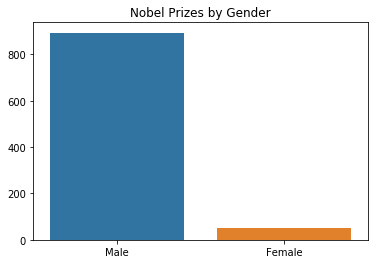

In [12]:
# Gender gap visualized:
sns.barplot(x=gender.index, y=gender.values)
plt.title('Nobel Prizes by Gender')

In [13]:
# Who was the first woman to win a Nobel Prize
first_female_winner = df[df['Sex']=='Female']
first_female_winner.nsmallest(1,'Year')

,Year,Category,Prize,Motivation,PrizeShare,LaureateID,LaureateType,FullName,BirthDate,BirthCity,BirthCountry,Sex,OrganizationName,OrganizationCity,OrganizationCountry,DeathDate,DeathCity,DeathCountry
19,1903,Physics,The Nobel Prize in Physics 1903,"""in recognition of the extraordinary services ...",1/4,6,Individual,"Marie Curie, née Sklodowska",1867-11-07,Warsaw,Russian Empire (Poland),Female,NaN,NaN,NaN,1934-07-04,Sallanches,France


# Nationality Analysis:

In [14]:
# Let's see people from how many countries have won a Nobel Prize:
len(df['BirthCountry'].value_counts())

121

People from 121 countries have won a Nobel Prize. That's a lot more than I was expecting. Let's dig deeper.

In [15]:
# Top ten countries with most awards:
countries = df['BirthCountry'].value_counts().head(10)
countries

United States of America    276
United Kingdom               88
Germany                      70
France                       53
Sweden                       30
Japan                        29
Russia                       20
Netherlands                  19
Canada                       18
Italy                        18
Name: BirthCountry, dtype: int64

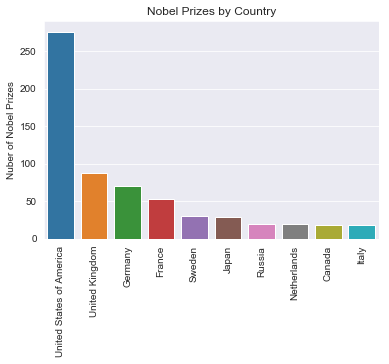

In [16]:
# Create a barchart of top ten countries:
sns.set_style('darkgrid')
sns.barplot(x=countries.index, y= countries.values)
plt.xticks(rotation = 90)
plt.title("Nobel Prizes by Country")
plt.ylabel('Nuber of Nobel Prizes');

United States citizens have won more nobels than next 5 countries combined. 

In [17]:
# Let's see percentage point of wins: 
print("US born people have won " + str(round(276/len(df) * 100,2)) + "% of the Nobel Prizes.")

US born people have won 28.48% of the Nobel Prizes.


# Looking at the raw data we see that none of the first winners of Nobel Prize were US citizens. 
When did US nationals start to win most of them? 

In [18]:
df.head(5)

,Year,Category,Prize,Motivation,PrizeShare,LaureateID,LaureateType,FullName,BirthDate,BirthCity,BirthCountry,Sex,OrganizationName,OrganizationCity,OrganizationCountry,DeathDate,DeathCity,DeathCountry
0,1901,Chemistry,The Nobel Prize in Chemistry 1901,"""in recognition of the extraordinary services ...",1/1,160,Individual,Jacobus Henricus van 't Hoff,1852-08-30,Rotterdam,Netherlands,Male,Berlin University,Berlin,Germany,1911-03-01,Berlin,Germany
1,1901,Literature,The Nobel Prize in Literature 1901,"""in special recognition of his poetic composit...",1/1,569,Individual,Sully Prudhomme,1839-03-16,Paris,France,Male,NaN,NaN,NaN,1907-09-07,Châtenay,France
2,1901,Medicine,The Nobel Prize in Physiology or Medicine 1901,"""for his work on serum therapy, especially its...",1/1,293,Individual,Emil Adolf von Behring,1854-03-15,Hansdorf (Lawice),Prussia (Poland),Male,Marburg University,Marburg,Germany,1917-03-31,Marburg,Germany
3,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,462,Individual,Jean Henry Dunant,1828-05-08,Geneva,Switzerland,Male,NaN,NaN,NaN,1910-10-30,Heiden,Switzerland
4,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,463,Individual,Frédéric Passy,1822-05-20,Paris,France,Male,NaN,NaN,NaN,1912-06-12,Paris,France


In [19]:
# Calculate the percent of USA winners for each decade
df['USWinners'] = df['BirthCountry']=='United States of America'
df['Decade'] = (np.floor(df['Year']/10)*10).astype(int)
Percent_US_winners = df.groupby('Decade', as_index=False)['USWinners'].mean()

# Percent of US_winner
Percent_US_winners

,Decade,USWinners
0,1900,0.017241
1,1910,0.075000
2,1920,0.074074
3,1930,0.241935
4,1940,0.288889
5,1950,0.278481
6,1960,0.262500
7,1970,0.308411
8,1980,0.313131
9,1990,0.392523


/Users/akurt/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


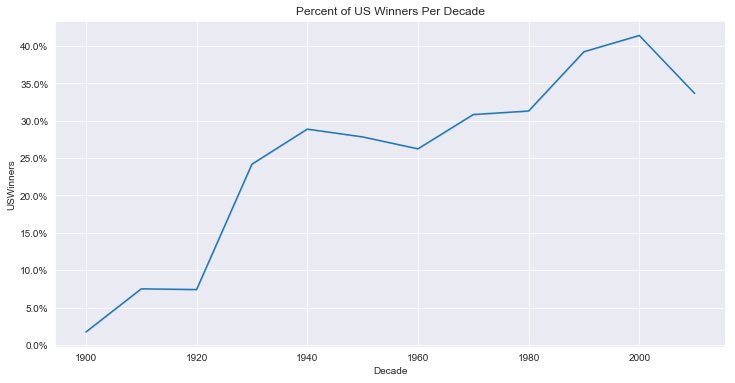

In [20]:
# Plot percent of US winners per decade:
fig, axes = plt.subplots(figsize=(12,6))
axes = sns.lineplot(x='Decade', y='USWinners', data=df, ci=False);

from matplotlib.ticker import PercentFormatter
axes.yaxis.set_major_formatter(PercentFormatter(1.0, symbol='%'))
plt.title('Percent of US Winners Per Decade');

In [21]:
orgs = df[df['OrganizationCountry'] == 'United States of America']

In [22]:
USorganizations = orgs['OrganizationName'].value_counts().head(10)

Text(0.5, 1.0, 'Number of Nobel Winners Per US Institution')

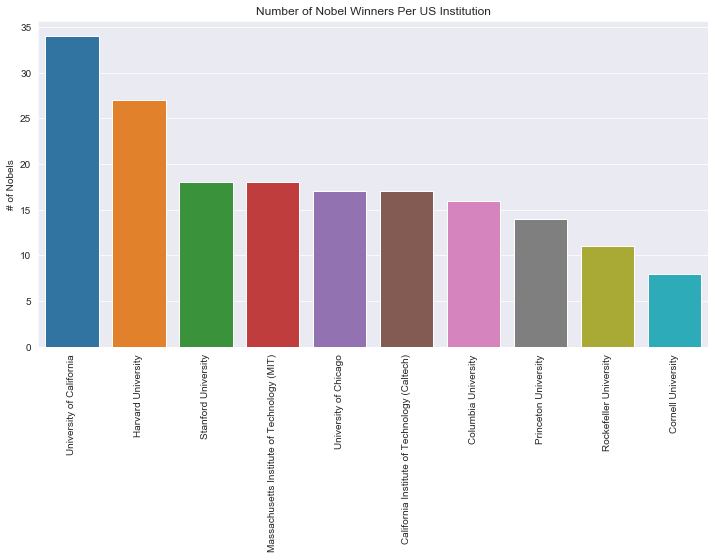

In [23]:
# Let's plot Top 10 US Institutions
fig, axes = plt.subplots(figsize=(12, 6))
axes = sns.barplot(x=USorganizations.index, y=USorganizations.values)
plt.xticks(rotation =90)
plt.ylabel('# of Nobels')
plt.title("Number of Nobel Winners Per US Institution")

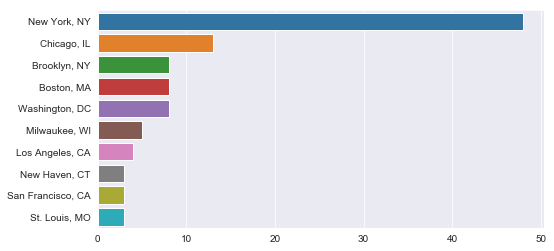

In [24]:
# Let's see in which cities most US winners were born:
city = df[df['BirthCountry'] == 'United States of America']
USCities = city['BirthCity'].value_counts().head(10)
fig, axes = plt.subplots(figsize=(8,4))
axes= sns.barplot(x=USCities.values, y=USCities.index)


# About 20% of US Nobel Winners were born in New York City
Let's look at birth places of Nobel Prize winners globally:

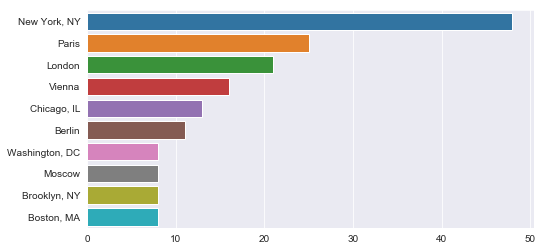

In [25]:
AllCities = df['BirthCity'].value_counts().head(10)
fig, axes = plt.subplots(figsize=(8,4))
axes= sns.barplot(x=AllCities.values, y=AllCities.index)

# New York had more winners that London and Paris combined. 
Let's see most common field for New York winners

In [26]:
new_york = df[df['BirthCity'] == 'New York, NY']
ny_field = new_york['Category'].value_counts()
ny_field

Physics       15
Medicine      14
Chemistry      9
Economics      8
Literature     1
Peace          1
Name: Category, dtype: int64

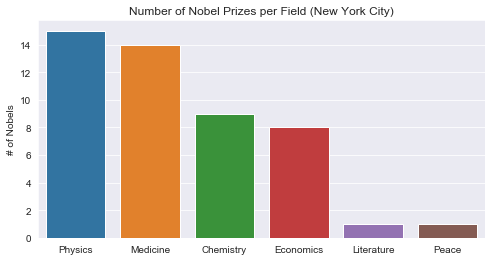

In [27]:
fig, axes = plt.subplots(figsize=(8,4))
axes= sns.barplot(y=ny_field.values, x=ny_field.index)
plt.ylabel('# of Nobels')
plt.title('Number of Nobel Prizes per Field (New York City)');

# Let's examine most commen field in the US

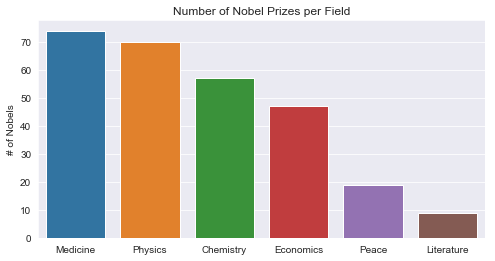

In [28]:
common_field = city['Category'].value_counts()
fig, axes = plt.subplots(figsize=(8,4))
axes = sns.barplot(x=common_field.index, y=common_field.values)
plt.ylabel('# of Nobels')
plt.title('Number of Nobel Prizes per Field');

# In the plot above we can see that there are 47 Nobel Laureates in Economics
We know that the Nobel committe started giving awards in Economics in 1969. It looks like, on average, there was one Laureate from US for each year. Let's see how many Nobel Laureates were for each year and take a look at proportion of US nationals for each prize. 

In [29]:
total_awards = df['Category'].value_counts()
total_awards

Medicine      227
Physics       222
Chemistry     194
Peace         130
Literature    113
Economics      83
Name: Category, dtype: int64

In [30]:
proportion_us_winner = (common_field/total_awards).sort_values(ascending=False)
proportion_us_winner

Economics     0.566265
Medicine      0.325991
Physics       0.315315
Chemistry     0.293814
Peace         0.146154
Literature    0.079646
Name: Category, dtype: float64

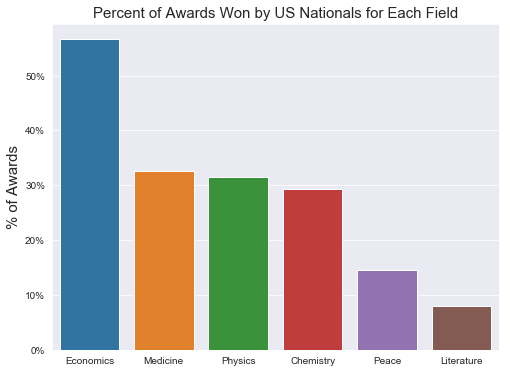

In [31]:
# plot proportions
fig, axes = plt.subplots(figsize=(8,6))
axes = sns.barplot(x=proportion_us_winner.index, y=proportion_us_winner.values)
plt.ylabel("% of Awards", size=15)
plt.title('Percent of Awards Won by US Nationals for Each Field', size=15)
from matplotlib.ticker import PercentFormatter
axes.yaxis.set_major_formatter(PercentFormatter(1.0, symbol='%'));

# Let's take a look at the age of Nobel Laureates

In [32]:
# Convert BirthDate to datetime:
df['BirthDate'] = pd.to_datetime(df['BirthDate'], errors='coerce')

In [33]:
# Create an Age column:
df['Age'] = df['Year'] - df['BirthDate'].dt.year

In [34]:
# Check the average age of winners:
df.groupby('Category', as_index=False)['Age'].agg(['mean', 'median'])

,mean,median
Category,,
Chemistry,58.134715,57.0
Economics,67.158537,67.0
Literature,64.672566,67.0
Medicine,57.933921,57.0
Peace,61.388350,62.0
Physics,55.850000,55.0


In [68]:
df.groupby(['Category', 'Sex'], as_index=False)['Age'].mean()

,Category,Sex,Age
0,Chemistry,Female,51.500000
1,Chemistry,Male,58.275132
2,Economics,Female,76.000000
3,Economics,Male,66.937500
4,Literature,Female,63.071429
5,Literature,Male,64.898990
6,Medicine,Female,62.583333
7,Medicine,Male,57.674419
8,Peace,Female,52.062500
9,Peace,Male,63.103448


In [69]:
df.groupby(['Category', 'Sex'], as_index=False)['Age'].mean().nlargest(2, 'Age')

,Category,Sex,Age
2,Economics,Female,76.0000
3,Economics,Male,66.9375


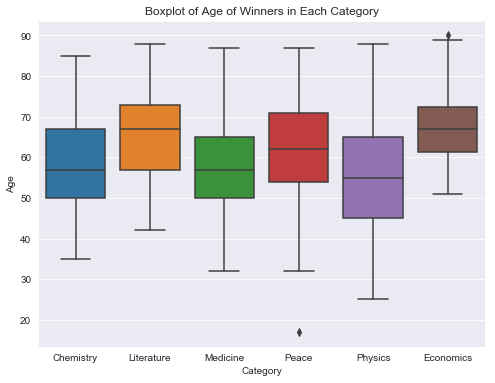

In [70]:
fig, axes = plt.subplots(figsize=(8,6))
axes = sns.boxplot(x='Category', y='Age', data=df)
plt.title('Boxplot of Age of Winners in Each Category');

# There are two outliers, one in Economics and the other in Peace
Economics Prize winners have the smallest age range, while Peace Prize winners have the largest. 
</p>Let's find out the outliers.</p>

In [72]:
# Yougest person to receive a Nobel Prize:
df[df["Age"] <= 20][['FullName', 'Category','Age', 'Year']]

,FullName,Category,Age,Year
940,Malala Yousafzai,Peace,17.0,2014


In [71]:
# The oldest person to recieve a Nobel Prize:
df[df["Age"] >= 90][['FullName', 'Category','Age', 'Year']]

,FullName,Category,Age,Year
825,Leonid Hurwicz,Economics,90.0,2007


In [75]:
df.groupby('Decade', as_index=False)['Age'].mean()

,Decade,Age
0,1900,57.771930
1,1910,52.842105
2,1920,54.981481
3,1930,51.000000
4,1940,58.047619
5,1950,54.717949
6,1960,56.106667
7,1970,59.311321
8,1980,60.250000
9,1990,62.221154


# It looks like the average age at which Nobel Prizes are awarded have been steadily rising. 
Let's plot the Age vs Year of the Nobel Prize. 

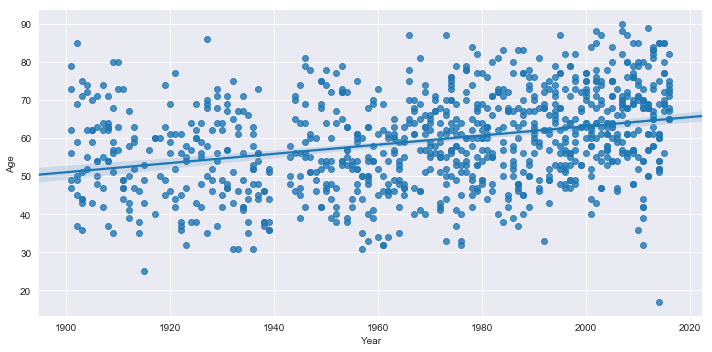

In [81]:
sns.lmplot(x='Year', y='Age', data=df, aspect=2 );